---

## Probability Distribution Functions: A Comprehensive Overview

**Probability Distribution Functions (PDFs)** describe how probabilities are distributed over the values of a random variable. They are essential for understanding the characteristics and behavior of data.

---

### Types of Probability Distribution Functions

There are two primary types of probability distribution functions, distinguished by the nature of the random variable they describe:

1.  **Probability Mass Function (PMF):**
    * **Used for:** **Discrete random variables** (variables that can only take on specific, distinct values, like whole numbers).
    * **Represents:** The probability of each specific outcome of the discrete random variable.
    * **Example (Rolling a Fair Die):**
        * Outcomes: 1, 2, 3, 4, 5, 6
        * Probability of each outcome: 1/6 (since it's a fair die, each outcome has an equal chance).
        * **PMF Graph:** A bar chart where the x-axis represents the outcomes and the y-axis represents their probabilities. Each bar's height for a fair die would be 1/6.
    * **Key Property:** The sum of all probabilities for all possible outcomes must equal 1.


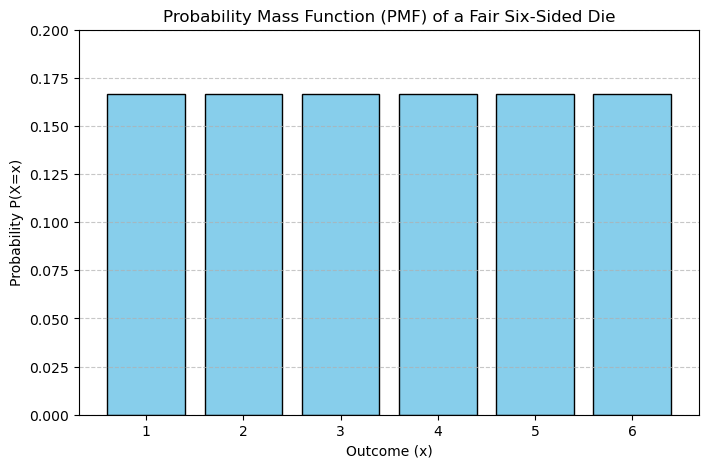

Outcomes: [1 2 3 4 5 6]
Probabilities: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Sum of probabilities: 1.00 (should be 1)


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define the possible outcomes (discrete values)
outcomes = np.array([1, 2, 3, 4, 5, 6])

# 2. Define the probability for each outcome
# For a fair die, each outcome has a probability of 1/6
probabilities = np.array([1/6] * len(outcomes))

# --- Plotting the PMF ---
plt.figure(figsize=(8, 5))
plt.bar(outcomes, probabilities, color='skyblue', edgecolor='black')
plt.title('Probability Mass Function (PMF) of a Fair Six-Sided Die')
plt.xlabel('Outcome (x)')
plt.ylabel('Probability P(X=x)')
plt.xticks(outcomes) # Ensure all outcomes are marked on the x-axis
plt.ylim(0, 0.2) # Set a consistent y-limit
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Verifying PMF properties ---
print(f"Outcomes: {outcomes}")
print(f"Probabilities: {probabilities}")
print(f"Sum of probabilities: {np.sum(probabilities):.2f} (should be 1)")


2.  **Probability Density Function (PDF):**
    * **Used for:** **Continuous random variables** (variables that can take any value within a given range, like age, height, or temperature).
    * **Represents:** The probability density at a given point. Unlike PMF, the y-axis in a PDF graph is *not* a direct probability for a single point, as the probability of a continuous variable taking an exact single value is theoretically zero.
    * **How it's Constructed:** Typically by smoothing a **histogram** of the continuous data. The x-axis represents the random variable's values, and the y-axis becomes "probability density."
    * **Example (Ages Distribution):**
        * If we have a bell-shaped curve for age distribution, the peak represents the mean age (e.g., 40 years) with the highest probability density.
    * **Key Properties of PDF:**
        * **Non-Negative:** The function $f(x)$ for a PDF is always greater than or equal to zero for all $x$ values.
        * **Total Area Under the Curve (AUC) is One:** The integral of the PDF over its entire range (from $-\infty$ to $+\infty$) is always equal to 1. This signifies that the total probability of all possible outcomes is 100%. Mathematically:
            $$\int_{-\infty}^{\infty} f(x) \, dx = 1$$
            This integral represents the area under the curve.

---


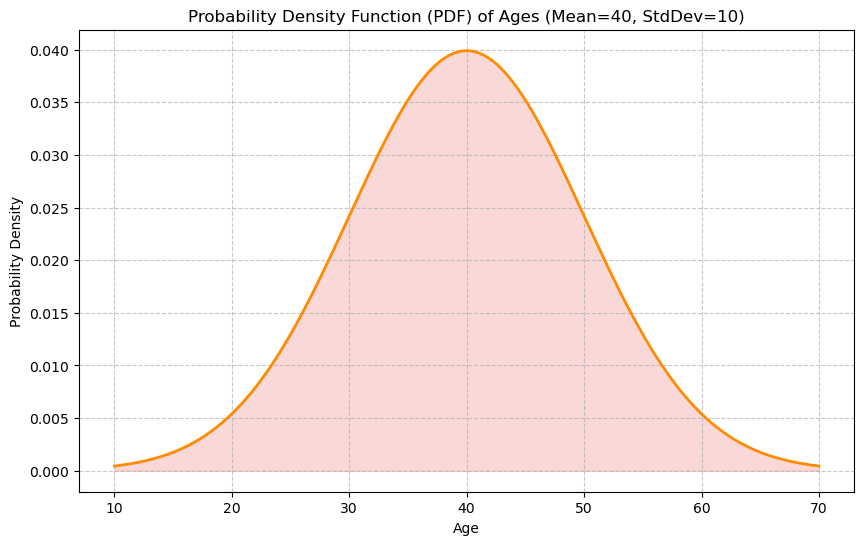

Probability density at age 40: 0.0399
This value itself is not a probability, but indicates the relative likelihood of an age being around 40.
It's the height of the curve, representing where values are more concentrated.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # Used to get the PDF values for a normal distribution

# 1. Define parameters for our continuous random variable (Age)
mean_age = 40  # The average age
std_dev_age = 10 # The spread of ages

# 2. Create a range of x-values (ages) for plotting
# We'll go from about 3 standard deviations below the mean to 3 above
x_ages = np.linspace(mean_age - 3*std_dev_age, mean_age + 3*std_dev_age, 500)

# 3. Calculate the PDF values for each x-value using the normal distribution function
# This is our f(x)
pdf_values = norm.pdf(x_ages, loc=mean_age, scale=std_dev_age)

# --- Plotting the PDF ---
plt.figure(figsize=(10, 6))
plt.plot(x_ages, pdf_values, color='darkorange', linewidth=2)
plt.title(f'Probability Density Function (PDF) of Ages (Mean={mean_age}, StdDev={std_dev_age})')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.grid(linestyle='--', alpha=0.7)
plt.fill_between(x_ages, pdf_values, color='lightcoral', alpha=0.3) # Shade the area under the curve
plt.show()

# --- Understanding Probability Density ---
# Probability of exactly age 40: P(X=40) is theoretically 0 for a continuous variable.
# What does the y-value at x=40 mean?
density_at_40 = norm.pdf(40, loc=mean_age, scale=std_dev_age)
print(f"Probability density at age 40: {density_at_40:.4f}")
print("This value itself is not a probability, but indicates the relative likelihood of an age being around 40.")
print("It's the height of the curve, representing where values are more concentrated.")


### Cumulative Distribution Function (CDF)

The **Cumulative Distribution Function (CDF)** (denoted as $F(x)$) provides the probability that a random variable $X$ will take a value **less than or equal to** a specific value $x$.

* **For PMF (Discrete Variables):** The CDF at a given point is the sum of probabilities of all outcomes up to that point. For the dice example, $F(2) = P(X \le 2) = P(X=1) + P(X=2) = 1/6 + 1/6 = 2/6 = 1/3$.
* **For PDF (Continuous Variables):** The CDF at a given point is the area under the PDF curve from $-\infty$ up to that point.
    * **Shape:** CDFs for continuous variables typically exhibit an "S-shape," starting at 0 and increasing monotonically to 1.
    * **Probability Density as Gradient:** The probability density at any point on the PDF curve is the **gradient (or derivative)** of the CDF curve at that same point. Where the CDF curve is steepest (indicating a rapid increase in cumulative probability), the probability density on the PDF will be highest (e.g., at the mean of a normal distribution).

---


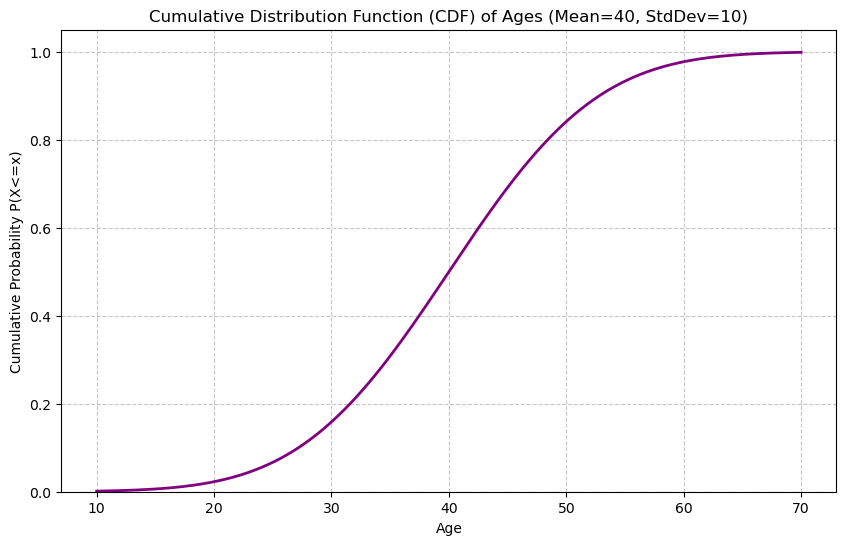

Probability of age <= 40: 0.50 (For a symmetrical distribution, this is 0.5 or 50%)
Probability of age <= 30: 0.16
Probability of age between 30 and 50: 0.68

Notice how the CDF curve is steepest around the mean (age 40), where the PDF was highest.
The slope of the CDF at any point corresponds to the probability density at that point.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # Used to get the CDF values for a normal distribution

mean_age = 40
std_dev_age = 10
x_ages = np.linspace(mean_age - 3*std_dev_age, mean_age + 3*std_dev_age, 500)

# Calculate the CDF values for each x-value
cdf_values_continuous = norm.cdf(x_ages, loc=mean_age, scale=std_dev_age)

# --- Plotting the CDF ---
plt.figure(figsize=(10, 6))
plt.plot(x_ages, cdf_values_continuous, color='purple', linewidth=2)
plt.title(f'Cumulative Distribution Function (CDF) of Ages (Mean={mean_age}, StdDev={std_dev_age})')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability P(X<=x)')
plt.grid(linestyle='--', alpha=0.7)
plt.ylim(0, 1.05)
plt.show()

# --- Answering questions using CDF (Area Under the Curve) ---

# Probability of age less than or equal to 40 (mean)
prob_le_40 = norm.cdf(40, loc=mean_age, scale=std_dev_age)
print(f"Probability of age <= 40: {prob_le_40:.2f} (For a symmetrical distribution, this is 0.5 or 50%)")

# Probability of age less than or equal to 30
prob_le_30 = norm.cdf(30, loc=mean_age, scale=std_dev_age)
print(f"Probability of age <= 30: {prob_le_30:.2f}")

# Probability of age between 30 and 50 (P(30 < X <= 50))
prob_le_50 = norm.cdf(50, loc=mean_age, scale=std_dev_age)
prob_between_30_50 = prob_le_50 - prob_le_30
print(f"Probability of age between 30 and 50: {prob_between_30_50:.2f}")

# How probability density is related to CDF's gradient (visual interpretation)
print("\nNotice how the CDF curve is steepest around the mean (age 40), where the PDF was highest.")
print("The slope of the CDF at any point corresponds to the probability density at that point.")


### Real-World Relevance

Understanding probability distribution functions is crucial for:

* **Data Analysis:** Different datasets often follow different distributions (e.g., normal, log-normal, binomial, Bernoulli), each conveying unique insights about the data's behavior.
* **Statistical Inference:** Knowing the underlying distribution allows data scientists to make informed assumptions, choose appropriate statistical tests, and build accurate predictive models.
* **Modeling:** The specific mathematical function $f(x)$ that defines a PDF or PMF changes depending on the type of distribution (e.g., a normal distribution will have a different $f(x)$ formula than a binomial distribution). These functions are vital for calculating probabilities and understanding the data's characteristics.




## Types of Probability Distribution

* **Bernoulli Distribution**:
    * Used for **binary outcomes** (e.g., 0 or 1, like a coin toss).
    * Applies to **discrete random variables**.
    * Uses a **PMF** to construct the distribution.
    * *Example*: A feature indicating if a house is near the seaside (yes/no).

* **Binomial Distribution**:
    * Also for **discrete random variables**.
    * Uses a **PMF**.
    * An important distribution that will be covered in more detail.

* **Normal (Gaussian) Distribution**:
    * A very common distribution, often recognized by its **bell-shaped curve**.
    * Applies to **continuous random variables**.
    * Uses a **PDF**.
    * Important because it has specific **properties and assumptions** that can help in training machine learning models more efficiently and are useful for data analysis.

* **Poisson Distribution**:
    * Constructed using a **PMF**.
    * Another significant distribution to be discussed.

* **Log-Normal Distribution**:
    * Followed by some datasets.
    * Applies to **continuous random variables**.
    * Uses a **PDF**.

* **Uniform Distribution**:
    * An "amazing" distribution with multiple examples to be shown.

---

### Why Understanding Distributions is Important:

The speaker provides a practical example using a **house price prediction dataset**. Different features within this dataset will follow different distributions:

* **Size of the house**: **Continuous random variable** (uses PDF).
* **Number of rooms**: **Discrete random variable** (uses PMF).
* **Location**: Can be converted into **discrete categories**.
* **Floor number**: **Discrete random variable** (e.g., cannot be 4.5 floors).
* **Near seaside (yes/no)**: **Bernoulli distribution** (binary, uses PMF).
* **Price**: **Continuous random variable** (uses PDF).

By identifying the type of distribution a feature follows (e.g., Bernoulli, Normal, Poisson), data professionals can:
* Understand the **relationships** within the data.
* Make **assumptions** about the data.
* Perform better **EDA**.
* Conduct more effective **feature engineering**.

Each distribution has a unique $f(x)$ function (the probability density or mass function) used to define its characteristics. The upcoming video series will delve into each distribution individually, explaining their $f(x)$ functions and providing examples.

The video explains the **Bernoulli Distribution**, the most basic discrete probability distribution. It's used for random variables with precisely **two possible outcomes**, typically labeled as 'success' (with probability $p$) or 'failure' (with probability $1-p$, or $q$).

**Key Concepts:**

* **Binary Outcomes:** A single trial always results in either a $0$ (failure) or a $1$ (success). Examples include a coin toss (heads/tails) or passing/failing an exam.
* **Parameters:** It's defined by the probability of success, $p$ (where $0 \le p \le 1$), and the probability of failure, $q = 1-p$. Outcomes are denoted as $k$, where $k=0$ or $k=1$.
* **Probability Mass Function (PMF):** The probability of observing an outcome $k$ is given by $P(X=k) = p^k \times (1-p)^{1-k}$.
    * For success ($k=1$), $P(X=1) = p$.
    * For failure ($k=0$), $P(X=0) = 1-p = q$.
    This PMF helps visualize the distribution as distinct bars for each outcome.

**Statistical Measures:**

* **Mean (Expected Value, $E[X]$):** Simply $p$.
* **Median:**
    * $0$ if $p < 0.5$.
    * $1$ if $p > 0.5$.
    * Can be $0$ or $1$ if $p = 0.5$.
* **Mode:** The outcome with the highest probability.
    * $1$ if $p > 0.5$.
    * $0$ if $p < 0.5$.
    * Both $0$ and $1$ if $p = 0.5$.
* **Variance:** $p \times q$ (or $p \times (1-p)$). It quantifies the spread of the distribution.
* **Standard Deviation:** The square root of the variance, $\sqrt{p \times q}$.

In essence, the Bernoulli distribution is fundamental for modeling simple binary events, providing a framework to understand their probabilities and key statistical characteristics.

Generating Bernoulli PMF plot for p = 0.7:


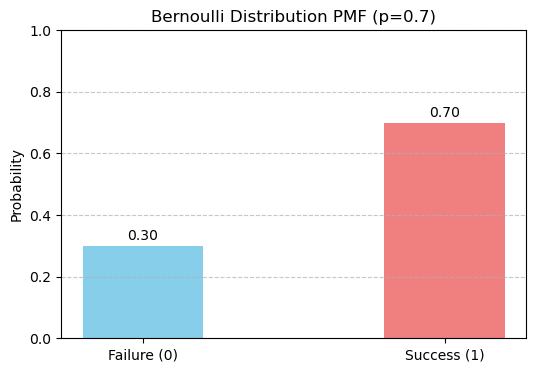


Generating Bernoulli PMF plot for p = 0.5:


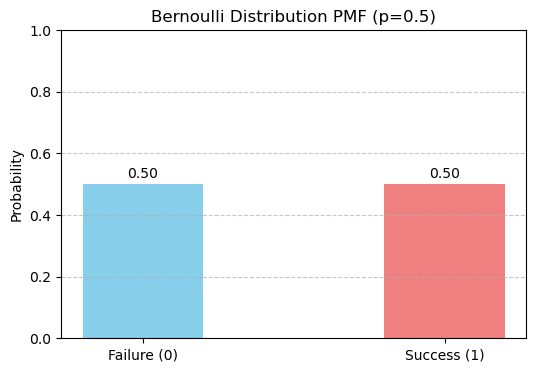


Generating Bernoulli PMF plot for p = 0.2:


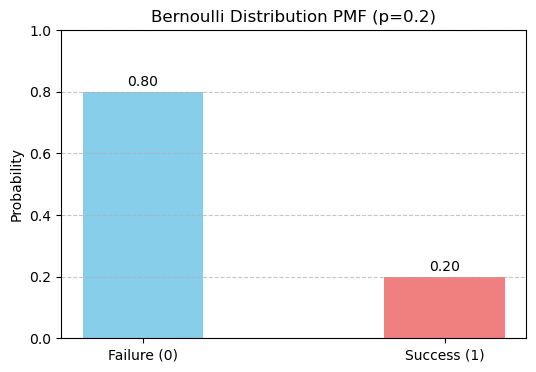

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

def bernoulli_pmf(k, p):
    """
    Calculates the Probability Mass Function (PMF) for a Bernoulli distribution.

    Args:
        k (int): The outcome (0 for failure, 1 for success).
        p (float): The probability of success (0 <= p <= 1).

    Returns:
        float: The probability of the outcome k.
               Returns 0 if k is not 0 or 1.
    """
    if not (0 <= p <= 1):
        raise ValueError("Probability 'p' must be between 0 and 1.")
    if k == 1:
        return p
    elif k == 0:
        return 1 - p
    else:
        return 0 # k must be 0 or 1 for Bernoulli

def plot_bernoulli_pmf(p):
    """
    Plots the Probability Mass Function (PMF) of a Bernoulli distribution.

    Args:
        p (float): The probability of success (0 <= p <= 1).
    """
    if not (0 <= p <= 1):
        raise ValueError("Probability 'p' must be between 0 and 1.")

    outcomes = [0, 1] # Possible outcomes for Bernoulli: Failure (0) or Success (1)
    # Calculate the probability for each outcome using the bernoulli_pmf function
    probabilities = [bernoulli_pmf(0, p), bernoulli_pmf(1, p)]

    # Create a new figure for the plot with a specified size
    plt.figure(figsize=(6, 4))
    # Create a bar chart:
    # - `outcomes` are the x-axis values (0 and 1)
    # - `probabilities` are the heights of the bars
    # - `color` assigns different colors to the bars
    # - `width` controls the width of the bars
    plt.bar(outcomes, probabilities, color=['skyblue', 'lightcoral'], width=0.4)

    # Set x-axis ticks and labels for better readability
    plt.xticks(outcomes, ['Failure (0)', 'Success (1)'])
    # Set the label for the y-axis
    plt.ylabel('Probability')
    # Set the title of the plot, including the probability 'p' value
    plt.title(f'Bernoulli Distribution PMF (p={p})')
    # Set the y-axis limits from 0 to 1, as probabilities are between 0 and 1
    plt.ylim(0, 1)
    # Add a horizontal grid for easier reading of probability values
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add text labels on top of each bar to show the exact probability value
    for i, prob in enumerate(probabilities):
        # `plt.text` places text at a given x, y coordinate.
        # `ha='center'` aligns the text horizontally in the center of the bar.
        # `prob + 0.02` places the text slightly above the bar.
        plt.text(outcomes[i], prob + 0.02, f'{prob:.2f}', ha='center')

    # Display the plot
    plt.show()

# --- Example Usage ---
if __name__ == "__main__":
    # Example 1: Probability of success = 0.7
    print("Generating Bernoulli PMF plot for p = 0.7:")
    plot_bernoulli_pmf(0.7)

    # Example 2: Probability of success = 0.5 (equal chance for success/failure)
    print("\nGenerating Bernoulli PMF plot for p = 0.5:")
    plot_bernoulli_pmf(0.5)

    # Example 3: Probability of success = 0.2
    print("\nGenerating Bernoulli PMF plot for p = 0.2:")
    plot_bernoulli_pmf(0.2)

<details>

<summary><h3><strong>Poisson Distribution</h3></strong></summary>

The Poisson distribution is a **discrete probability distribution** that is used to model the probability of a given number of events happening within a fixed interval of time or space.

**Key Concepts:**

* **Discrete Random Variable:** It applies to variables that are countable (e.g., 0, 1, 2, 3 events), not continuous. Because it's discrete, it uses a **Probability Mass Function (PMF)** to describe its probabilities.
* **Conditions for Use:** It is applicable when events occur at a **known constant mean rate** and are **independent** of the time since the last event.
* **Common Examples:**
    * The number of people visiting a bank every hour.
    * The number of calls a call center receives per minute.
    * The number of accidents on a highway stretch per day.

**The Lambda ($\lambda$) Parameter:**

* The distribution is defined by a single parameter, **lambda ($\lambda$)**, which represents the **expected (or average) number of events** in the given interval.
* For example, if a hospital expects an average of 3 admissions per hour, then $\lambda = 3$.
* The shape of the distribution graph changes with $\lambda$. As $\lambda$ increases, the peak of the distribution moves to the right and it becomes more spread out, starting to resemble a bell curve.

**The Probability Mass Function (PMF) Formula:**

The probability of observing exactly **x** events in an interval is calculated using the formula:

$$P(X=x) = \frac{e^{-\lambda} \lambda^x}{x!}$$

Where:
* $e$ is the base of the natural logarithm (~2.71828).
* $\lambda$ is the average number of events.
* $x$ is the specific number of events you are calculating the probability for.
* $x!$ is the factorial of $x$.

**Calculating Probabilities:**

You can use the PMF to answer questions like:

* **Probability of an exact number of events:** "What is the probability of *exactly 5* people visiting at 4 p.m.?"
    * Calculate $P(X=5)$.
* **Probability of a range of events:** "What is the probability of a person visiting at 4 p.m. *or* 5 p.m.?"
    * Calculate $P(X=4) + P(X=5)$.
* **Cumulative probability:** "What is the probability of a person arriving in *less than or equal to 3* hours?"
    * Calculate the sum: $P(X=0) + P(X=1) + P(X=2) + P(X=3)$.

**Mean and Variance:**

For a Poisson distribution, both the mean (expected value) and the variance have a simple relationship with lambda:

* **Mean ($\mu$):** $\mu = \lambda t$ (where 't' is the time interval). For a single interval, the mean is simply $\lambda$.
* **Variance ($\sigma^2$):** The variance is also equal to $\lambda t$.
  


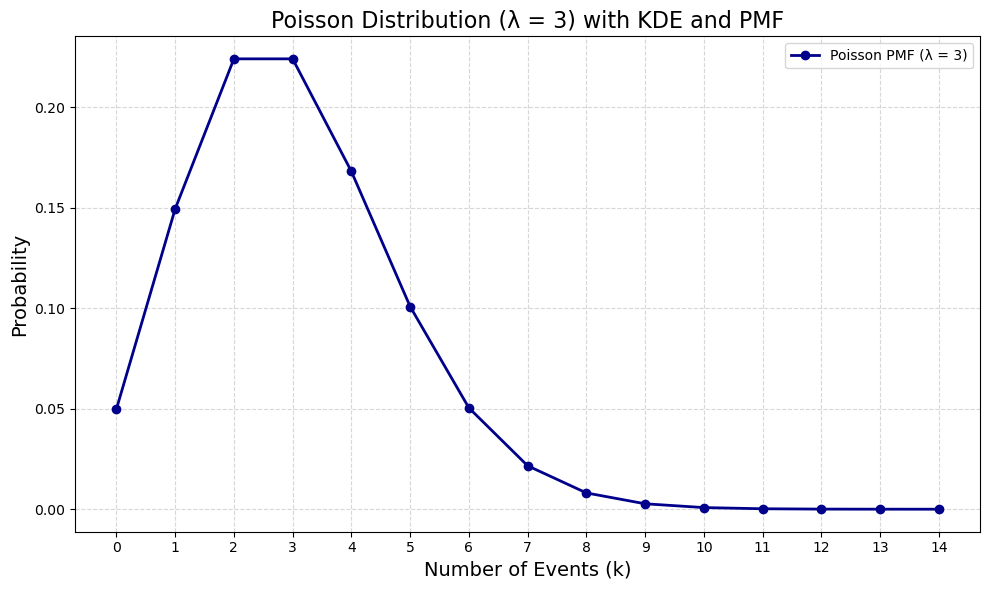

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
# Improved plot: Overlaying PMF and KDE with styling
plt.figure(figsize=(10, 6))
mu = 3  # mean of the Poisson distribution

samples = poisson.rvs(mu, size=1000)
x = np.arange(0, 15)  # range of x values

# Plot histogram with KDE
# sns.histplot(samples, bins=np.arange(0, 15) - 0.5, stat='probability', kde=True, color='lightblue', edgecolor='black', label='Sample Histogram + KDE')
pmf = poisson.pmf(x, mu)

# Overlay actual Poisson PMF
plt.plot(x, pmf, 'o-', color='darkblue', label='Poisson PMF (λ = 3)', linewidth=2)

# Enhancements
plt.title("Poisson Distribution (λ = 3) with KDE and PMF", fontsize=16)
plt.xlabel("Number of Events (k)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xticks(np.arange(0, 15))
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()



## 🎯 **Normal (Gaussian) Distribution**

---

### ✅ **Definition:**

The **Normal distribution** (or **Gaussian distribution**) is a **continuous probability distribution** for a **real-valued random variable**. It is widely used because many **real-world datasets** (like heights, weights, IQ scores, etc.) tend to follow this distribution.

---

### 🧠 **Key Characteristics:**

* **Continuous Distribution** → Applies to **real-valued random variables**
* **Bell-shaped curve** → Symmetric about the mean
* **Mean = Median = Mode**
* **Symmetry** → 50% of values lie on each side of the mean

---

### 📌 **Notation:**

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$

Where:

* $\mu$: Mean (center of the distribution)
* $\sigma^2$: Variance (spread of the distribution)

---

### 📊 **Parameters:**

* **Mean (μ)**: Central value of the distribution
* **Variance (σ²)**: Measures the spread
* **Standard Deviation (σ)**: Square root of variance

As **variance increases**, the **curve becomes flatter and wider**. As **variance decreases**, the curve becomes **sharper and narrower**.

---

### 📌 **PDF (Probability Density Function):**

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{1}{2} \left( \frac{x - \mu}{\sigma} \right)^2 }
$$

This defines the shape of the normal curve, where:

* $x$: Random variable
* $\mu$: Mean
* $\sigma$: Standard deviation

Note: You don't need to memorize this; in coding, it's computed using libraries like `scipy.stats.norm`.

---

### 📈 **Examples of Normally Distributed Data:**

* **Heights** and **weights** of students in a class
* **Petal length** in the Iris dataset
* **IQ scores**, **blood pressure**, **SAT scores**, etc.

---

### 📐 **Empirical Rule (68–95–99.7 Rule):**

If data follows a normal distribution:

* **68%** of data falls within **±1 standard deviation** of the mean
* **95%** of data falls within **±2 standard deviations**
* **99.7%** of data falls within **±3 standard deviations**

This helps us understand **how data is spread** around the mean.

$$
P(\mu - \sigma \leq X \leq \mu + \sigma) \approx 68\%
$$

$$
P(\mu - 2\sigma \leq X \leq \mu + 2\sigma) \approx 95\%
$$

$$
P(\mu - 3\sigma \leq X \leq \mu + 3\sigma) \approx 99.7\%
$$

---

### 🔍 **Why This Matters:**

* Many **statistical models assume normality**
* Helps in identifying **outliers**, building **confidence intervals**, and performing **hypothesis testing**
* **Foundational for z-tests**, t-tests, and many machine learning techniques

---

### 📚 **Further Notes:**

* To **test if data follows a normal distribution**, use **Q-Q plots**
* The **area under the PDF curve is always 1**, and **PDF values are not direct probabilities**, but **densities**

---



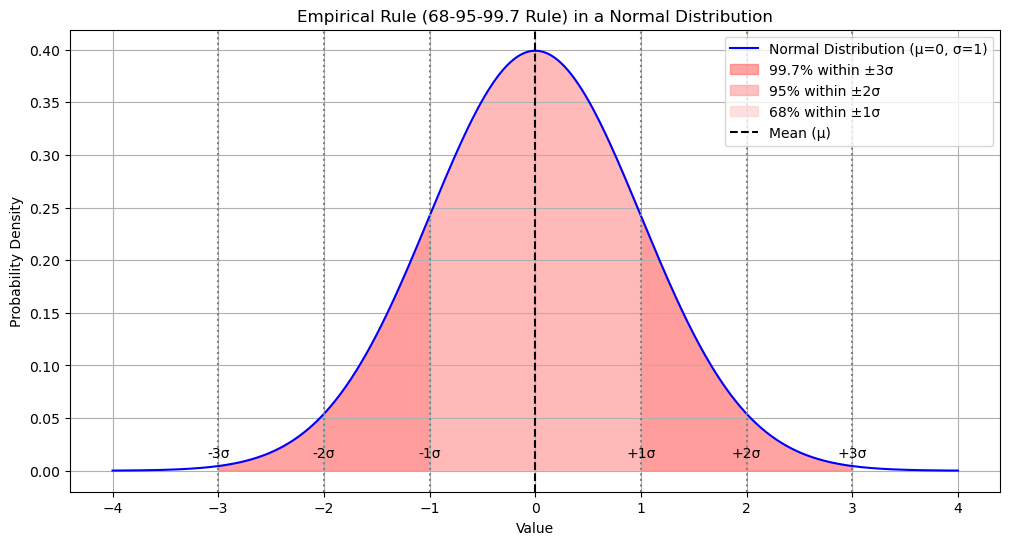

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mu = 0       # mean
sigma = 1    # standard deviation

# Generate x values
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

# Plot the normal distribution curve
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Normal Distribution (μ=0, σ=1)', color='blue')
plt.title('Empirical Rule (68-95-99.7 Rule) in a Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')

# Shaded regions for empirical rule
colors = ['#ffcccc', '#ff9999', '#ff6666']
ranges = [1, 2, 3]
percentages = ['68%', '95%', '99.7%']

for i in range(3, 0, -1):
    x_fill = np.linspace(mu - i*sigma, mu + i*sigma, 1000)
    y_fill = norm.pdf(x_fill, mu, sigma)
    plt.fill_between(x_fill, y_fill, color=colors[i-1], alpha=0.6, label=f'{percentages[i-1]} within ±{i}σ')

# Mean line
plt.axvline(mu, color='black', linestyle='--', label='Mean (μ)')

# Add text annotations for boundaries
for i in range(1, 4):
    plt.axvline(mu - i*sigma, color='gray', linestyle=':')
    plt.axvline(mu + i*sigma, color='gray', linestyle=':')
    plt.text(mu + i*sigma, 0.01, f'+{i}σ', ha='center', va='bottom', fontsize=10)
    plt.text(mu - i*sigma, 0.01, f'-{i}σ', ha='center', va='bottom', fontsize=10)

plt.legend()
plt.grid(True)
plt.show()


###  **Standard Normal Distribution**

* It’s a special case of the normal distribution.
* Defined by:

  * **Mean = 0**
  * **Standard Deviation = 1**
* Any normal distribution can be transformed into a standard normal distribution using a **Z-score**.

---

### 3. **Z-Score Formula**

$$
Z = \frac{X_i - \mu}{\sigma}
$$

* It tells **how many standard deviations a value $X_i$** is away from the **mean**.
* Example:

  * Original value: 1, Mean: 3, Std Dev: 1 → Z = (1 - 3) / 1 = -2

---

### 4. **Why is Z-Score Important?**

* Allows us to **standardize data**, making it comparable.
* Essential for:

  * **Calculating probabilities and areas under the curve**
  * **Finding how far a value is from the mean**
  * **Using Z-tables to determine probability ranges**

---

### 5. **Applications in Real-World Scenarios**

#### 📌 *Standardization in Machine Learning*

* Consider a dataset with different features: **age, weight, height, salary** — all having different units.
* Algorithms (e.g., Linear Regression, Clustering) perform better when features are on the **same scale**.
* Standardization = Applying Z-score to each feature:

  $$
  \text{Standardized Value} = \frac{\text{Original Value} - \text{Mean}}{\text{Standard Deviation}}
  $$
* This scales all values to have:

  * Mean ≈ 0
  * Std Dev ≈ 1
  * Most values between **-3 to +3**

---

### 6. **Visual Understanding**

* On a bell curve:

  * 4.25 is 0.25 standard deviations away from a mean of 4 → Z = 0.25
  * 2.5 is 1.5 standard deviations to the left of mean 4 → Z = -1.5

---

## ✅ **Key Takeaways**

* **Z-Score** is a transformation that makes data standardized.
* **Standard Normal Distribution** simplifies analysis by having a fixed scale (μ = 0, σ = 1).
* Z-scores are widely used in **EDA, feature scaling, and model training**.
* Helps in comparing values across distributions and identifying outliers or significant deviations.


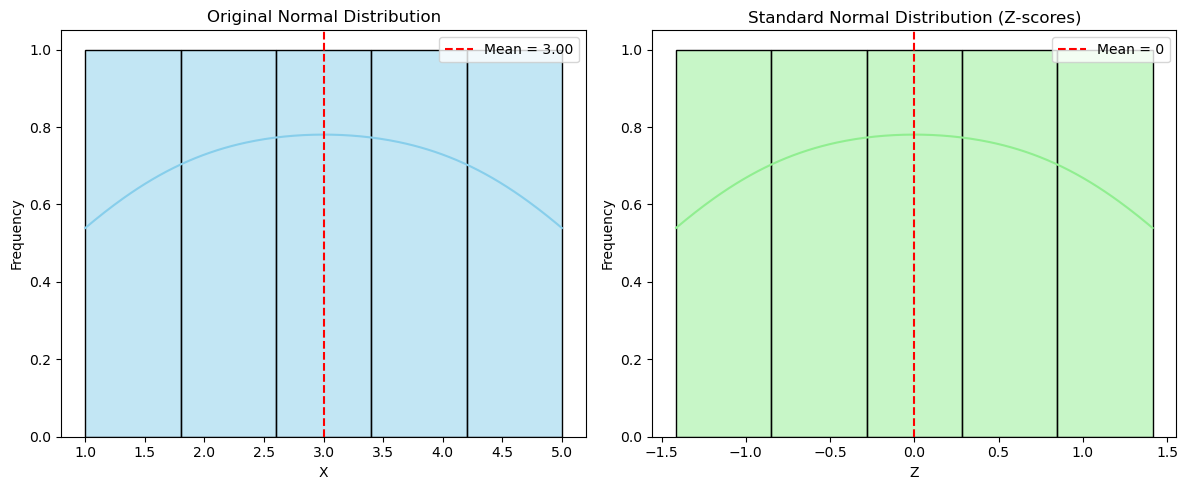

In [15]:
# 📦 Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 🧮 Raw data and original normal distribution
data = np.array([1, 2, 3, 4, 5])
mean_original = np.mean(data)
std_original = np.std(data)

# Show original data distribution
plt.figure(figsize=(12, 5))

# 📊 Original Distribution
plt.subplot(1, 2, 1)
sns.histplot(data, bins=5, kde=True, color='skyblue')
plt.axvline(mean_original, color='red', linestyle='--', label=f'Mean = {mean_original:.2f}')
plt.title('Original Normal Distribution')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.legend()

# 🔁 Apply Z-score transformation
z_scores = (data - mean_original) / std_original
mean_z = np.mean(z_scores)
std_z = np.std(z_scores)

# 📊 Z-Score Transformed Distribution (Standard Normal)
plt.subplot(1, 2, 2)
sns.histplot(z_scores, bins=5, kde=True, color='lightgreen')
plt.axvline(0, color='red', linestyle='--', label='Mean = 0')
plt.title('Standard Normal Distribution (Z-scores)')
plt.xlabel('Z')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


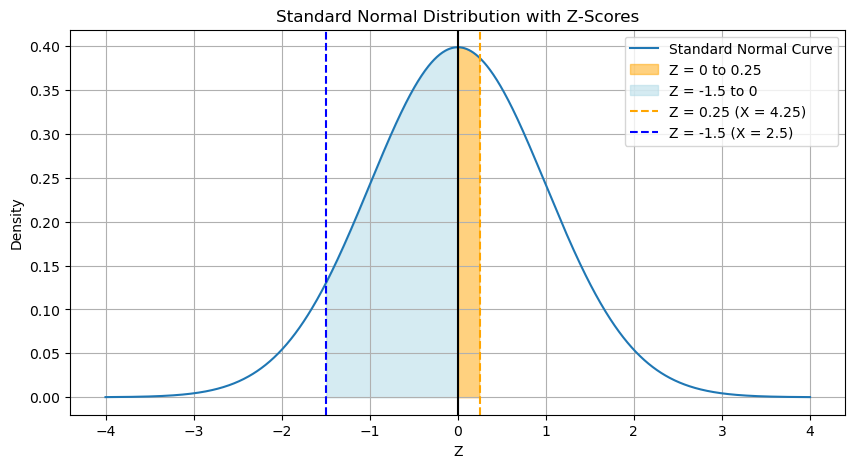

In [16]:
# 🎯 Visualize standard normal curve with z-score positions

x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=0, scale=1)

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Standard Normal Curve')
plt.fill_between(x, y, where=(x >= 0) & (x <= 0.25), color='orange', alpha=0.5, label='Z = 0 to 0.25')
plt.fill_between(x, y, where=(x >= -1.5) & (x <= 0), color='lightblue', alpha=0.5, label='Z = -1.5 to 0')

plt.axvline(0.25, color='orange', linestyle='--', label='Z = 0.25 (X = 4.25)')
plt.axvline(-1.5, color='blue', linestyle='--', label='Z = -1.5 (X = 2.5)')
plt.axvline(0, color='black', linestyle='-')

plt.title('Standard Normal Distribution with Z-Scores')
plt.xlabel('Z')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Here’s a structured **summary** of your video script on **uniform distribution**:

---

### 🎯 **Topic: Uniform Distribution in Statistics**

Uniform distribution is of two types:

---

### 📈 **1. Continuous Uniform Distribution (Rectangular Distribution)**

#### ✅ **Definition:**

* Applies to **continuous random variables**.
* Every value in the interval **\[a, b]** is equally likely.
* Called "rectangular" due to the flat shape of the PDF.

#### 📌 **Key Concepts:**

* **PDF (Probability Density Function):**

  $$
  f(x) = 
  \begin{cases}
  \frac{1}{b - a} & \text{for } a \leq x \leq b \\
  0 & \text{otherwise}
  \end{cases}
  $$
* **CDF (Cumulative Distribution Function):**

  $$
  F(x) = 
  \begin{cases}
  0 & \text{for } x < a \\
  \frac{x - a}{b - a} & \text{for } a \leq x \leq b \\
  1 & \text{for } x > b
  \end{cases}
  $$

#### 📊 **Mean, Median, Variance:**

* Mean = Median = $\frac{a + b}{2}$
* Variance = $\frac{(b - a)^2}{12}$

#### 📍 **Example:**

* Daily candy sales are uniformly distributed between 10 and 40.
* Find probability of sales between 15 and 30:

  $$
  P(15 \leq X \leq 30) = \frac{30 - 15}{40 - 10} = \frac{15}{30} = 0.5
  $$
* Probability of sales ≥ 20:

  $$
  P(X \geq 20) = \frac{40 - 20}{40 - 10} = \frac{20}{30} = 0.66
  $$

---

### 🎲 **2. Discrete Uniform Distribution**

#### ✅ **Definition:**

* Applies to **discrete random variables** with a **finite set of equally likely outcomes**.

#### 📌 **Key Concepts:**

* PMF (Probability Mass Function):

  $$
  P(x) = \frac{1}{n}
  $$

  where $n = b - a + 1$

* Every outcome in the range $[a, b]$ has equal probability.

#### 📊 **Mean, Median:**

* Mean = Median = $\frac{a + b}{2}$

#### 📍 **Examples:**

* **Rolling a fair die:**
  Outcomes = 1 to 6
  Each outcome has $P = \frac{1}{6}$

* **Tossing a fair coin:**
  Outcomes = Head or Tail
  Each has $P = \frac{1}{2}$

---

### ✅ **Summary Points:**

* Uniform distributions are **symmetrical**.
* **Continuous** uses **PDF**; **Discrete** uses **PMF**.
* Easy to compute probabilities due to equal likelihood.
* Applicable in real-life scenarios like dice rolls, fair games, or simulations.

---

Let me know if you’d like slides or visuals built from this summary!



### 🎯 **Log-Normal Distribution**

---

### ✅ **Definition:**

A **log-normal distribution** is a continuous probability distribution of a **random variable X**, where:

* The **logarithm of X** (i.e., $Y = \ln(X)$) is **normally distributed**.
* If $X \sim \text{LogNormal}(\mu, \sigma)$, then $Y = \ln(X) \sim \mathcal{N}(\mu, \sigma)$.

---

### 🔁 **Transformation Relationship:**

* If $X \sim \text{LogNormal} \Rightarrow Y = \ln(X) \sim \text{Normal}$
* Conversely, if $Y \sim \text{Normal} \Rightarrow X = e^Y \sim \text{LogNormal}$

---

### 📊 **Shape and Characteristics:**

* **Right-skewed** distribution (long tail to the right).
* **Not symmetric** like the normal distribution.
* Relationship between **mean > median > mode**.

---

### 🧪 **How to Check for Log-Normality:**

* Use a **Q-Q plot** (Quantile-Quantile Plot).
* If $\ln(X)$ plots approximately on a straight line in the Q-Q plot, then X follows a log-normal distribution.

---

### 🧠 **Real-World Examples That Follow Log-Normal Distribution:**

1. **Wealth Distribution**:

   * A few people hold most of the wealth (e.g., Elon Musk, Bill Gates).
   * Salaried class lies in the lower/left side of the distribution.

2. **Length of Comments in Discussion Forums**:

   * Many short comments, a few very long ones.

3. **Length of Chess Games**:

   * Most are short or average length; few last very long.

4. **Dwell Time on Online Articles**:

   * Most users spend short time; few spend long time reading.

---

### 🔁 **Summary of Key Concepts:**

| Concept                 | Description                                                                    |
| ----------------------- | ------------------------------------------------------------------------------ |
| Log-Normal Distribution | Distribution where log of variable is normally distributed                     |
| Right-Skewed            | Tail on the right side is longer                                               |
| Transformations         | $Y = \ln(X) \rightarrow \text{Normal}$, $X = e^Y \rightarrow \text{LogNormal}$ |
| Detection Method        | Q-Q Plot of $\ln(X)$                                                           |
| Common Applications     | Wealth, comments length, chess game duration, dwell time                       |



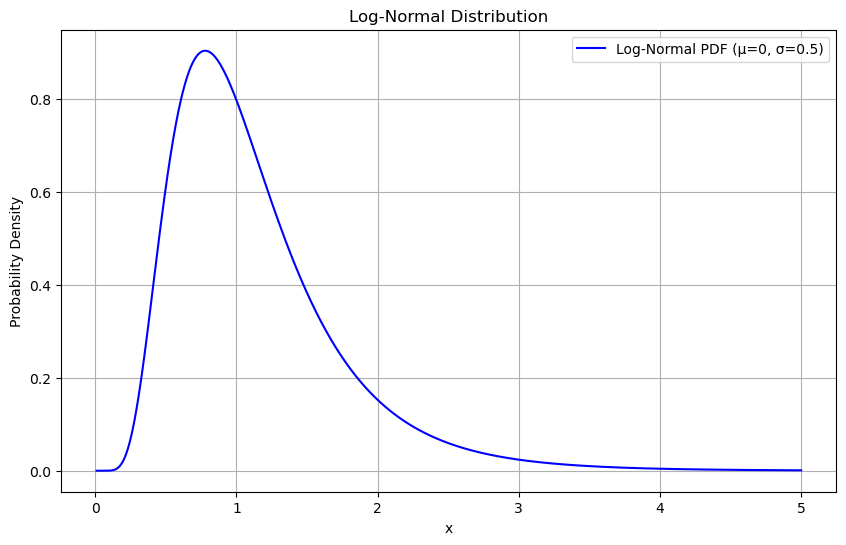

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Parameters for the log-normal distribution
mu = 0      # Mean of the underlying normal distribution
sigma = 0.5 # Standard deviation of the underlying normal distribution

# Generate x values (positive values only, since log-normal is defined for x > 0)
x = np.linspace(0.01, 5, 1000)

# Compute the PDF of the log-normal distribution
pdf = lognorm.pdf(x, s=sigma, scale=np.exp(mu))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Log-Normal PDF (μ={mu}, σ={sigma})', color='blue')
plt.title('Log-Normal Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()


### 🎥 **Power Law Distribution **

In this video, we dive into **Power Law Distribution**, a **non-Gaussian** distribution that appears in many real-world datasets. It’s especially useful to understand **uneven, imbalanced relationships** in data.

---

### 🔹 **Definition**

A **power law** describes a **functional relationship** between two variables where:

* A relative change in one variable results in a **proportional relative change** in the other,
* Independent of the starting values.
* Formally: **One quantity varies as a power of another** (i.e., 𝑌 ∝ 𝑋⁻ᵅ).

---

### 🔹 **Key Characteristics**

* It follows the **Pareto Principle** or the **80/20 Rule**.
* **20% of causes** are responsible for **80% of effects**.
* The **distribution curve is steep on the left** (few dominate), with a **long tail on the right** (many have small impact).

---

### 🔹 **Examples**

1. **IPL Matches**: 20% of teams win 80% of the matches.
2. **Wealth Distribution**: 20% of the population holds 80% of the wealth.
3. **Crude Oil**: 20% of nations control 80% of global oil.
4. **Word Frequencies**: 20% of words are used 80% of the time in most languages.
5. **IT Defects**: 20% of defects cause 80% of future issues.

---

### 🔹 **Visualization**

* Compared to normal or log-normal curves, **power law curves** sharply drop and **extend long toward the right**, showing **rare but significant** events in the tail.

---

### 🔹 **Transforming Power Law to Normal**

* Just like **log-normal data** can be converted into normal data using a **log transform**, power law data can be normalized using a **Box-Cox Transformation**.
* This is crucial for **machine learning models** that assume normally distributed input features.

---

### 🔹 **Pareto Distribution**

* A specific type of **power law distribution**.
* Also follows the 80/20 rule.
* Will be discussed in detail in the next video.

---

### 🔹 **Validation**

* To confirm normality after transformation, use **Q-Q Plots**.


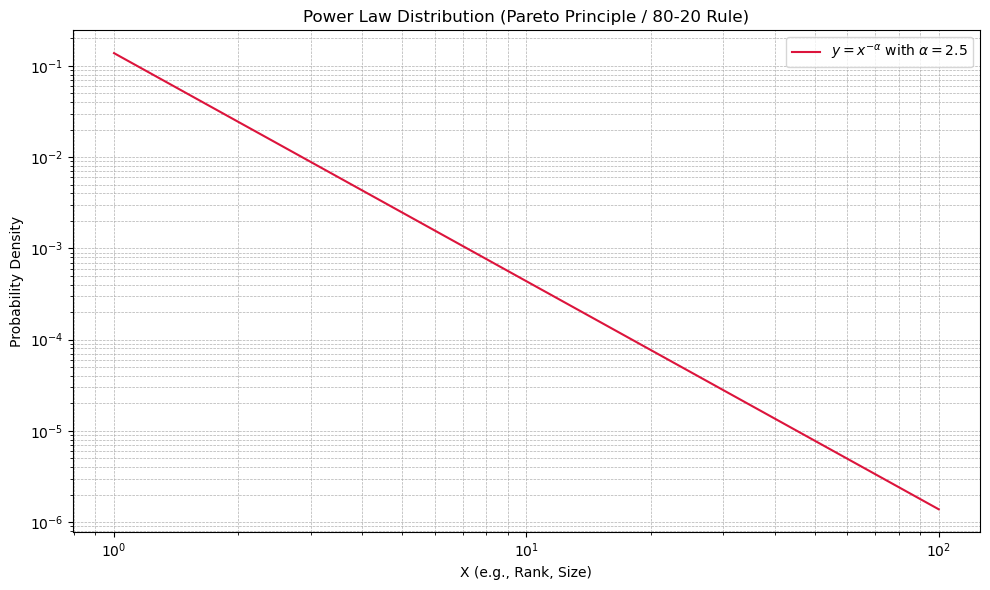

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate power law data
x = np.linspace(1, 100, 1000)
alpha = 2.5  # Power law exponent
y = x**(-alpha)

# Normalize y to make it resemble a PDF (optional for illustration)
y = y / np.sum(y)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$y = x^{-\alpha}$ with $\alpha=2.5$', color='crimson')
plt.title('Power Law Distribution (Pareto Principle / 80-20 Rule)')
plt.xlabel('X (e.g., Rank, Size)')
plt.ylabel('Probability Density')
plt.yscale('log')  # Log scale to show the heavy tail
plt.xscale('log')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()
    

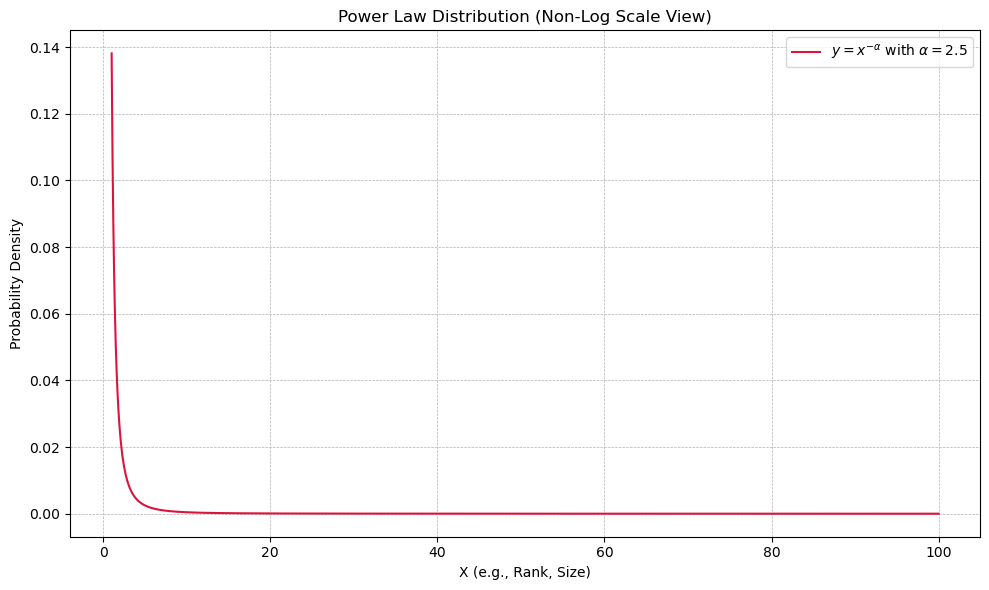

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate power law data (non-log scale for nonlinear plot)
x = np.linspace(1, 100, 1000)
alpha = 2.5  # Power law exponent
y = x**(-alpha)

# Normalize y for comparison
y = y / np.sum(y)

# Plotting without log scales (nonlinear view)
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$y = x^{-\alpha}$ with $\alpha=2.5$', color='crimson')
plt.title('Power Law Distribution (Non-Log Scale View)')
plt.xlabel('X (e.g., Rank, Size)')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()


### 🎥 **Pareto Distribution**

In this video, we explore the **Pareto distribution**, which is a specific case of the **Power Law Distribution**. It’s a **non-Gaussian distribution** and is widely recognized for modeling **imbalanced, real-world phenomena**.

---

### 🔹 **Definition**

* The **Pareto distribution** follows the **Power Law**, where a small number of causes account for a large portion of the effect — also known as the **80/20 rule**.
* Mathematically, it is governed by a shape parameter **α (alpha)**.
* As **α increases**, the **probability density function (PDF)** becomes steeper and more concentrated near the origin.

---

### 🔹 **Key Concepts**

* **Alpha (α)**: Controls the steepness of the curve. Higher α means the curve becomes sharper and peaks more quickly.
* **PDF Shape**: Always right-skewed with a **long tail**, indicating rare but high-impact events.
* **Power Law**: All Pareto distributions follow a power law (but not all power laws are Pareto).

---

### 🔹 **Transformation to Normal**

* Just like **log-normal data** can be transformed into a **normal distribution** using a **log transformation**, Pareto-distributed data can be transformed using a **Box-Cox transformation**.
* This is important in **machine learning**, where many algorithms assume normally distributed inputs.

---

### 🔹 **Use Cases & Examples**

1. **IT Industry – Work Distribution**:
   20% of the team does 80% of the work.

2. **Defect Fixing in Software**:
   Solving 20% of critical bugs addresses 80% of defect issues.

3. **Wealth Distribution**:
   20% of people control 80% of the wealth.

4. **Salary Distribution in Companies**:
   20% of employees receive 80% of the total compensation.

---

### 🔹 **Key Insight**

* **Pareto Distribution** is useful to model **inequality, concentration, and dominance** in real-world systems.
* It **always follows a power law** and can be normalized using transformation techniques for statistical modeling and machine learning.


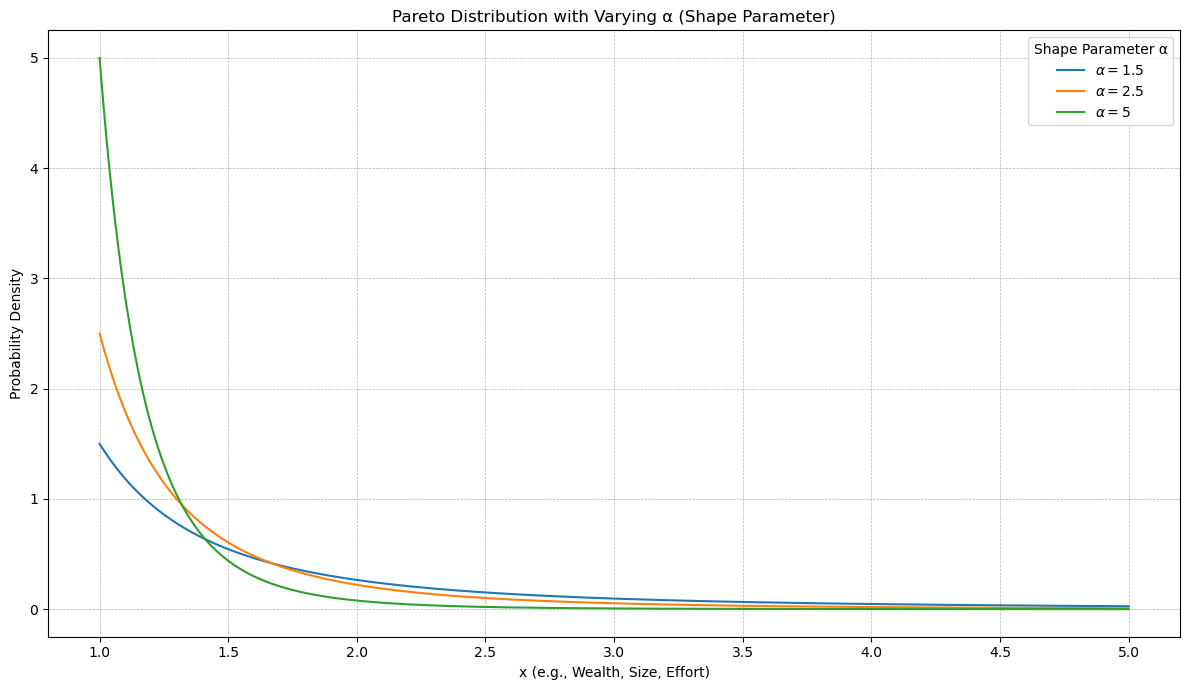

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pareto

# Generate data for different alpha (shape) values
x = np.linspace(1, 5, 1000)
alphas = [1.5, 2.5, 5]

# Plotting PDF for different alpha values
plt.figure(figsize=(12, 7))

for alpha in alphas:
    y = pareto.pdf(x, b=alpha, scale=1)
    plt.plot(x, y, label=rf'$\alpha={alpha}$')

# Annotations and formatting
plt.title('Pareto Distribution with Varying α (Shape Parameter)')
plt.xlabel('x (e.g., Wealth, Size, Effort)')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(title="Shape Parameter α")
plt.tight_layout()
plt.show()


### 🎥 **Central Limit Theorem **

---

### 📘 **Definition**

The **Central Limit Theorem (CLT)** states that:

> The **sampling distribution of the sample mean** will tend to be **normally distributed**, **regardless of the original population distribution**, provided the **sample size is sufficiently large**.

---

### 🔹 **Key Concepts**

1. **Sampling Distribution**:
   The probability distribution of a statistic (like the mean) from **multiple samples** drawn from a population.

2. **CLT Behavior**:

   * If the **population is normal**, then the **sample mean distribution is also normal**, **even for small sample sizes**.
   * If the **population is not normal** (e.g., skewed, Poisson, binomial), the **sample mean distribution still becomes normal** as long as the **sample size (n) ≥ 30**.

---

### 🔹 **Two Scenarios**

#### ✅ Case 1: Population is Normally Distributed

* Sample size **n** can be any value.
* Sampling distribution of the sample mean will be **normal**.

#### ✅ Case 2: Population is NOT Normally Distributed

* Sample size **n ≥ 30** required.
* Sampling distribution of the sample mean **still becomes approximately normal**.

---

### 🔍 **CLT Implications**

* Regardless of the shape of the population distribution, the **mean of the sample means** will tend toward a **normal distribution** as the number of samples increases.
* This helps us **approximate probabilities** using the **normal distribution curve**, even when working with non-normal populations.

---

### 📊 **Changes in Mean & Standard Deviation**

When sampling is performed:

* **Sample Mean (x̄)** ≈ **Population Mean (μ)**
* **Sample Standard Deviation** = $\frac{\sigma}{\sqrt{n}}$
  Where:

  * $\sigma$ = Population standard deviation
  * $n$ = Sample size

This relationship is crucial for building **confidence intervals** and performing **hypothesis testing**.

---

### 🛠️ **Real-Life Use of CLT**

* It underpins most statistical methods in **data science** and **machine learning**.
* Enables the use of **Z-scores**, **t-tests**, and **confidence intervals** even with non-normal data — as long as sample size is large.


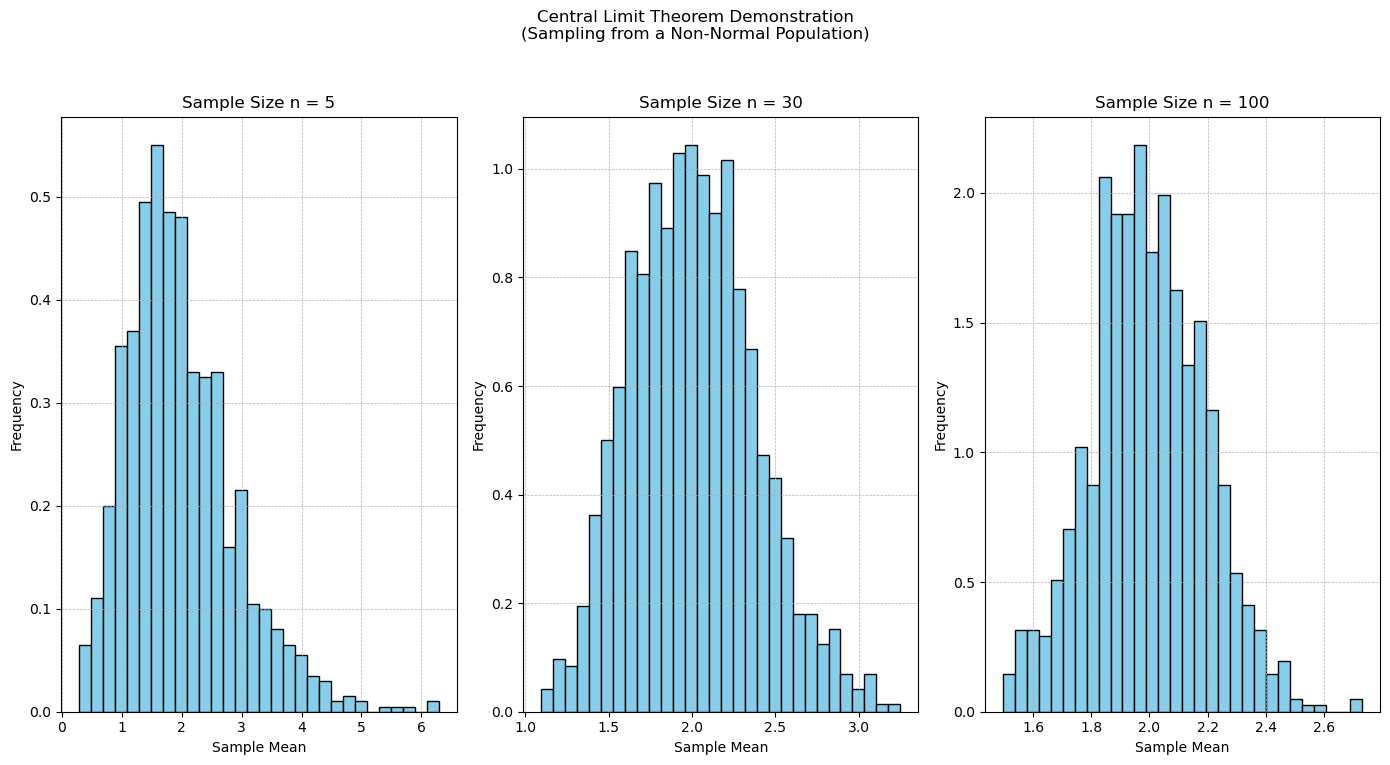

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set the population distribution (non-normal, right-skewed exponential)
population = np.random.exponential(scale=2, size=100000)

# Sample means for different sample sizes
sample_sizes = [5, 30, 100]
sample_means = {}

# Generate sample means
for n in sample_sizes:
    means = [np.mean(np.random.choice(population, size=n, replace=False)) for _ in range(1000)]
    sample_means[n] = means

# Plotting
plt.figure(figsize=(14, 8))

for i, n in enumerate(sample_sizes):
    plt.subplot(1, 3, i + 1)
    plt.hist(sample_means[n], bins=30, color='skyblue', edgecolor='black', density=True)
    plt.title(f'Sample Size n = {n}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.suptitle('Central Limit Theorem Demonstration\n(Sampling from a Non-Normal Population)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### 🎥 **Estimates**

---

### 🔍 **What is an Estimate?**

An **estimate** is an **observed numerical value** used to infer or **approximate an unknown population parameter**.

> It plays a central role in **inferential statistics**, which is used to make predictions or decisions about a population based on sample data.

---

### 📌 **Types of Estimates**

#### 1. **Point Estimate**

* A **single numerical value** used to estimate an unknown population parameter.
* **Example**:
  If $\bar{x}$ is the sample mean and $\mu$ is the population mean,
  then $\bar{x}$ is a **point estimate** of $\mu$.

#### ✅ Use Case:

* You draw a sample from a population.
* You compute its mean (say 60).
* You claim this sample mean represents the population mean.

🟠 **Limitation**: A single point may not accurately represent the entire population.

---

#### 2. **Interval Estimate**

* A **range of values** used to estimate the population parameter.
* Expressed as:

  $$
  \text{Point Estimate} \pm \text{Margin of Error}
  $$
* This gives rise to the **confidence interval**.

#### ✅ Use Case:

* Sample mean = 60
* Instead of just saying 60, you specify a range: **55 to 65**
* This interval increases the **reliability** of your estimate

🟢 **Confidence Interval**: The range within which the population parameter is expected to fall, with a certain confidence level (e.g., 95%).

---

### 💡 Key Insight

* **Point Estimate** = precise but possibly inaccurate
* **Interval Estimate** = broader but more reliable
* Interval estimates are preferred for more accurate representation of population characteristics.


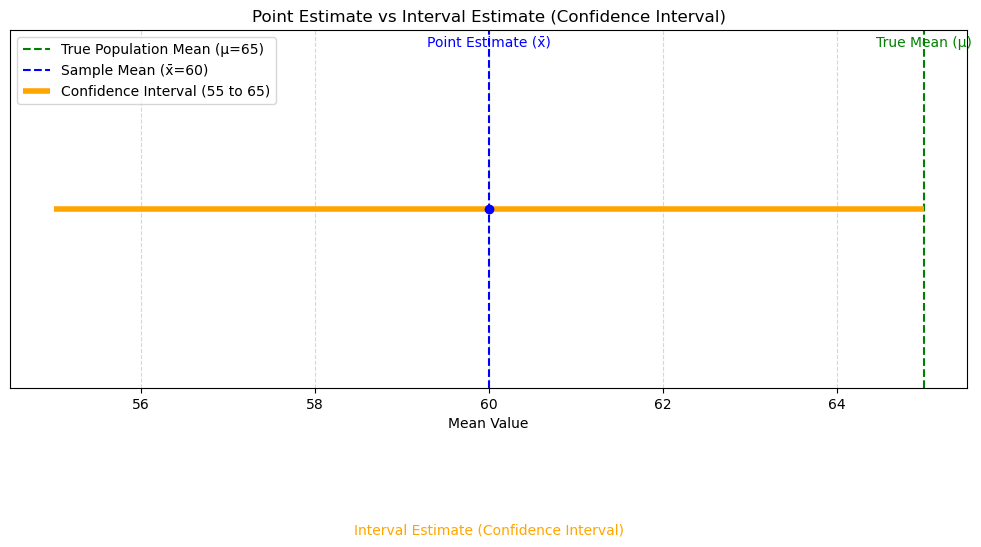

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Assume the true population mean is 65
true_population_mean = 65

# Simulate sample mean
sample_mean = 60
margin_of_error = 5

# Define interval
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

# Create a plot
plt.figure(figsize=(10, 6))
plt.axvline(true_population_mean, color='green', linestyle='--', label='True Population Mean (μ=65)')
plt.axvline(sample_mean, color='blue', linestyle='--', label='Sample Mean (x̄=60)')
plt.hlines(y=1, xmin=ci_lower, xmax=ci_upper, color='orange', linewidth=4, label='Confidence Interval (55 to 65)')
plt.plot(sample_mean, 1, 'bo')  # point estimate marker

# Annotate
plt.text(sample_mean, 1.05, 'Point Estimate (x̄)', ha='center', color='blue')
plt.text(true_population_mean, 1.05, 'True Mean (μ)', ha='center', color='green')
plt.text((ci_lower + ci_upper)/2, 0.9, 'Interval Estimate (Confidence Interval)', ha='center', color='orange')

# Formatting
plt.title('Point Estimate vs Interval Estimate (Confidence Interval)')
plt.xlabel('Mean Value')
plt.yticks([])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
